# Supervised Learning

# Linear Regression with Pyton - Houseprices

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

- Entenda o problema. Observe cada variável e faça uma análise sobre seu significado e importância para o problema.
- Estudo do alvo (target). Concentre-se na variável dependente ('SalePrice') e procure saber um pouco mais sobre ela.
- Estudo multivariado. Tente entender as correlações entre as variáveis.
- Limpeza básica. Limpe o conjunto de dados e manipule os dados ausentes, valores discrepantes e variáveis categóricas.
- Testar hipóteses (modelos). Verifique se os dados atendem às suposições exigidas pela maioria das técnicas.

## Exploração de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv("train.csv")

### Entendendo os dados

In [4]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.head()

### Valor Alvo

In [5]:
# Checking the target
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

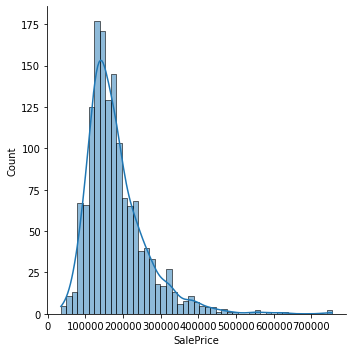

In [6]:
sns.displot(df["SalePrice"],  kde=True);

### Correlações

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
#scatterplot - Pairplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

### Missing  Data

In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...

### Out liars

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
sns.displot(df['GrLivArea'])

In [ ]:
#deleting points
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Dummy Variables

In [ ]:
#convert categorical variable into dummy
df = pd.get_dummies(df)

In [ ]:
newcols = df.columns
df[newcols[range(50,70)]].head()
# print(len(newcols))

## O Modelo

In [ ]:
cols = ['GrLivArea', 'TotalBsmtSF', 'YearBuilt','BsmtUnfSF'] #
predictors = df[cols]
target = df['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
?LinearRegression

In [ ]:
y_pred = lr.predict(X_test)

_preds_df = pd.DataFrame(dict(observed=y_test, predicted=y_pred))
_preds_df.head()

In [ ]:
from sklearn.metrics import mean_squared_error

print('Score: {}'.format(lr.score(X_test, y_test)))
print('MSE: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))